## セクション１０　非線形回帰
- 多項式特徴量（Polynominal Features）
- 交互作用項(Interaction term)

<AxesSubplot:xlabel='horsepower', ylabel='mpg'>

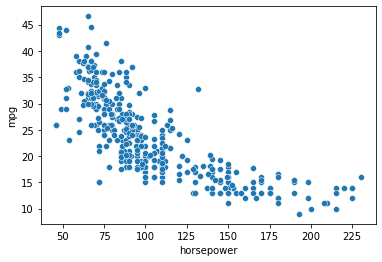

In [56]:
import seaborn as sns
df = sns.load_dataset('mpg') # mile per gallon
df.dropna(inplace=True)
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
# hold-out, 5fold
sns.scatterplot(x=df['horsepower'], y=df['mpg'])

In [57]:
# 多項式特徴量
from sklearn.preprocessing import PolynomialFeatures
X = df['horsepower'].values.reshape(-1, 1)
# 普通はバイアス項は不要なのでinclide_bias=Falseにする
Poly= PolynomialFeatures(degree=3,include_bias=False)
X_poly = Poly.fit_transform(X)

#線形回帰
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_poly, y)

LinearRegression()

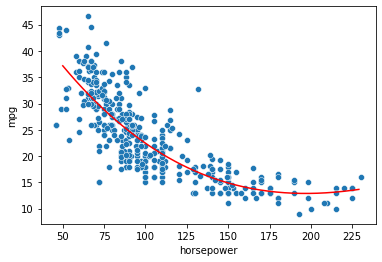

In [58]:
#　描画
import numpy as np
import matplotlib.pyplot as plt
x_axis = np.arange(50, 230).reshape(-1, 1)
x_axis_ = Poly.fit_transform(x_axis)
pred = model.predict(x_axis_)
sns.scatterplot(x=df['horsepower'], y=df['mpg'])
plt.plot(x_axis, pred, 'r')

## 課題:多項式回帰と線形回帰の精度を比較する
- horsepowerからmpgを予測するモデルを作成する
- degree=1,2,3
- k-fold = 5を三回繰り返し汎化性能を比較
- 評価指標はMSE

In [59]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

df = sns.load_dataset('mpg')
df = df.dropna()
X = df['horsepower'].values.reshape(-1,1)
y = df['mpg']

degree = 3
model = LinearRegression()
cv = RepeatedKFold(n_splits=5,n_repeats=3,random_state=0)
scores = []
for i in range(1,degree+1):
    Poly= PolynomialFeatures(degree=i,include_bias=False)
    X_poly = Poly.fit_transform(X)
    pipeline = Pipeline(steps = [('model',model)])
    score = cross_val_score(pipeline,X_poly,y,scoring='neg_mean_squared_error', cv=cv)
    scores.append(-1 * score)
print(f'1次のMSE：{np.mean(scores[0])},標準偏差は{np.std(scores[0])}')
print(f'2次のMSE：{np.mean(scores[1])},標準偏差は{np.std(scores[1])}')
print(f'3次のMSE：{np.mean(scores[2])},標準偏差は{np.std(scores[2])}')

1次のMSE：24.235391801372007,標準偏差は3.3466777741729663
2次のMSE：19.29496951717167,標準偏差は4.413627004206183
3次のMSE：19.433811692985767,標準偏差は4.508223823033294


## 模範解答

In [60]:

# データ準備
X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
degrees = [1, 2, 3]
# model = LinearRegression()
k = 5
n_repeats = 3
cv = RepeatedKFold(n_splits=k, n_repeats=n_repeats, random_state=0)
results = {}
for d in degrees:
    # poly = PolynomialFeatures(d)
    # X_poly = poly.fit_transform(X)
    # pipelineを使うことでコードを簡潔に書くことが可能
    pipeline = Pipeline(steps=[('poly', PolynomialFeatures(d)), ('model', LinearRegression())])
    scores = cross_val_score(pipeline, X, y, scoring='neg_mean_squared_error', cv=cv)
    results[f"degree {d}"] = {'scores_mean': -np.mean(scores), 'scores_std': np.std(scores)}
pd.DataFrame(results)

,degree 1,degree 2,degree 3
scores_mean,24.235392,19.294970,19.433812
scores_std,3.346678,4.413627,4.508224


## KNN
- 分類でよく使われる画家域でも使える
- 数式モデルを使わないノンパラメトリック非線形回帰モデル
- ノンパラメトリックなので、より柔軟な回帰曲線を引ける
- 最も近いkこの学習データの平均を予測値にする
- 距離ベースのアルゴリズムなので、特徴量スケーリングでが必要

<AxesSubplot:ylabel='mpg'>

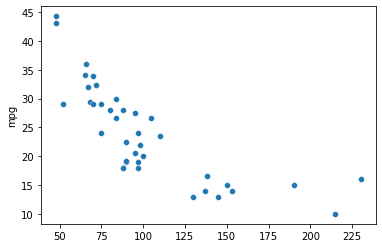

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.9,random_state=0)
sns.scatterplot(x=X_train[:,0],y=y_train)

In [30]:
from sklearn.neighbors import KNeighborsRegressor
model = KNeighborsRegressor(n_neighbors=10)
model.fit(X_train,y_train)


KNeighborsRegressor(n_neighbors=10)

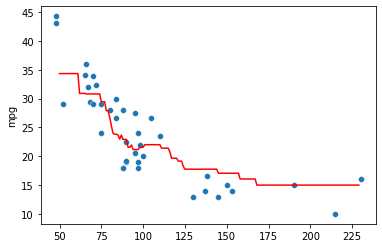

In [32]:
#描画する
X_axis = np.arange(50,230).reshape(-1,1)
y_pred = model.predict(X_axis)
sns.scatterplot(x=X_train[:,0], y=y_train)
plt.plot(x_axis,y_pred,'r')
plt.show()

## 課題；さまざまなkでのknnの精度を比較する
- horsepowerからmpgを予測するモデルを作成
- k=1~30
- 5foldを三回繰り返し汎化性能を比較
- 評価指標MSE
- kを増加したときのMSEの推移をプロット


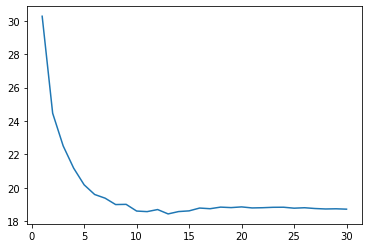

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedKFold,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

df = sns.load_dataset('mpg')
df.head(2)
df = df.dropna()

X = df['horsepower'].values.reshape(-1, 1)
y = df['mpg']
scores = []
k_value = np.arange(1,31)
cv = RepeatedKFold(n_splits=5,n_repeats=3,random_state=0)
for i in k_value:
    model = KNeighborsRegressor(n_neighbors=i)
    score = cross_val_score(estimator=model, X=X, y=y,scoring='neg_mean_squared_error',cv=cv)
    

    scores.append(-np.mean(score))

plt.plot(k_value,scores)
plt.show()